In [ ]:

import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read in the data
weather = pd.read_csv("data/london_weather.csv")


In [5]:
weather

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [45]:
weather.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               0
mean_temp              0
min_temp               0
precipitation          2
pressure               4
snow_depth          1424
year                   0
month                  0
dtype: int64

In [6]:
weather.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [42]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
 10  year              15341 non-null  int32         
 11  month             15341 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(2)
memory usage: 1.3 MB


In [13]:
weather['date'] = pd.to_datetime(weather['date'], format="%Y%m%d")

In [17]:
weather

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,1
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,1
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,1
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,1
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,2020,12
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,2020,12
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,2020,12
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN,2020,12


In [15]:
weather['year'] = weather['date'].dt.year

In [16]:
weather['month'] = weather['date'].dt.month

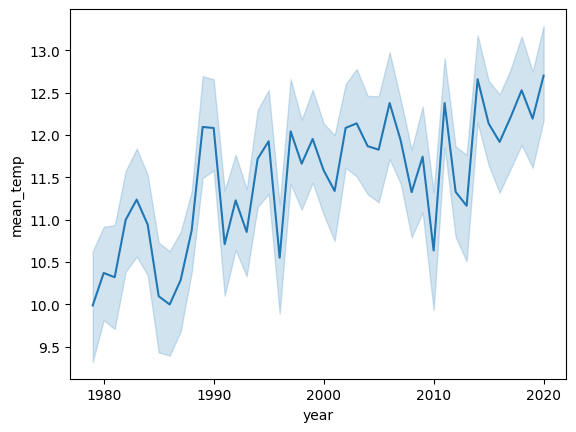

In [20]:
sns.lineplot(x=weather['year'], y=weather['mean_temp'])
plt.show()

<Axes: >

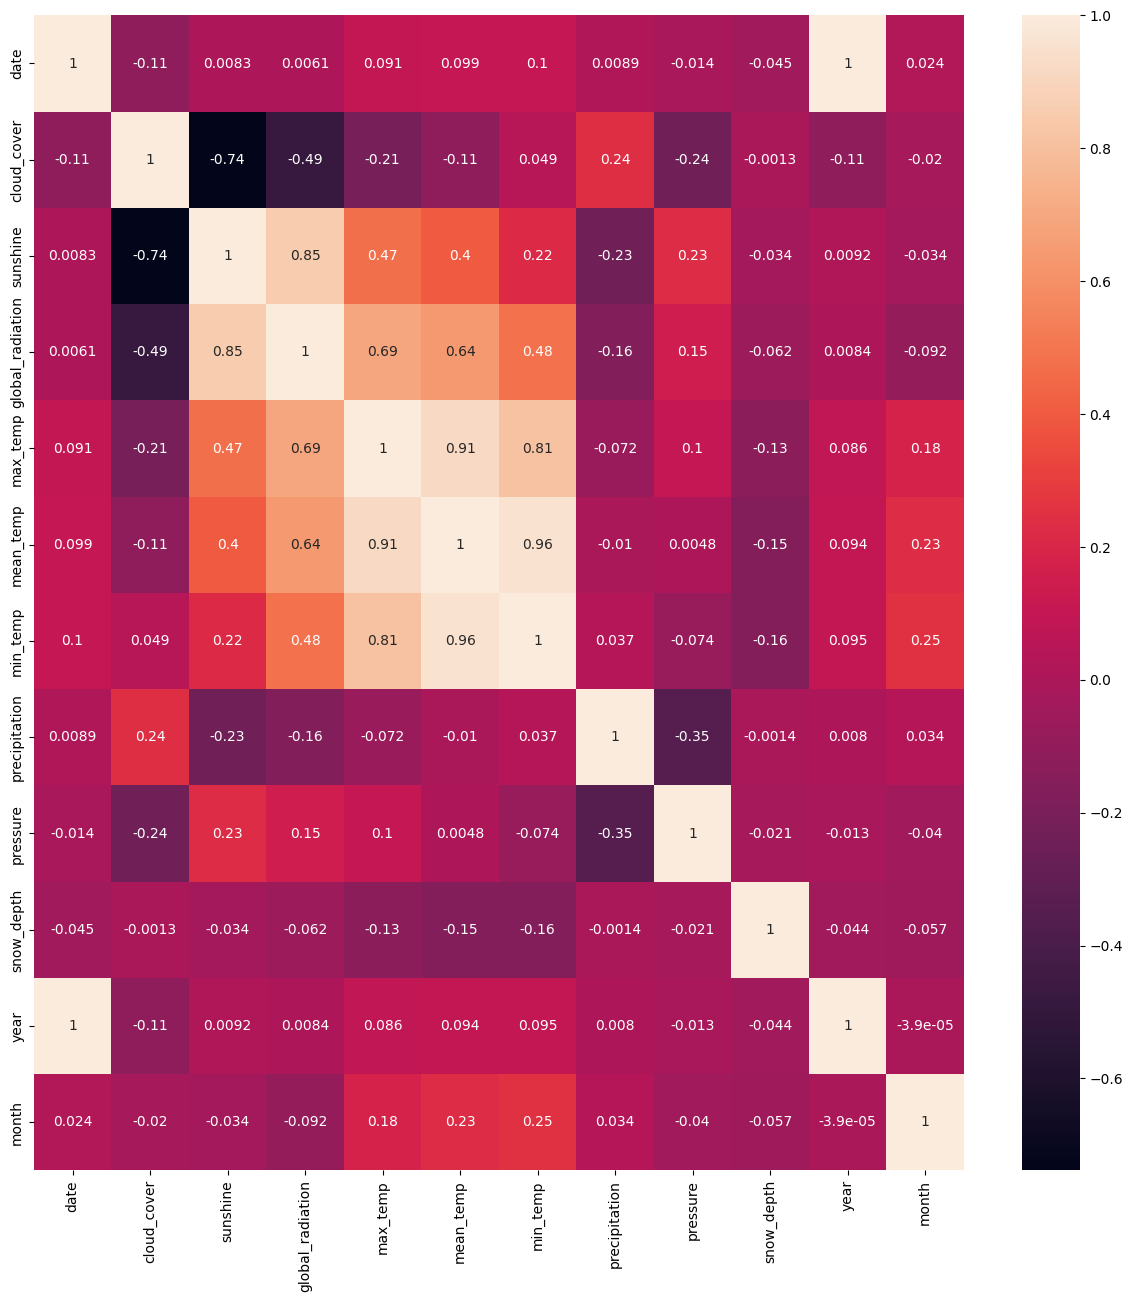

In [24]:
ax, fig = plt.subplots(figsize=[15,15])
sns.heatmap(weather.corr(), annot=True)

In [32]:
weather.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth',
       'year', 'month'],
      dtype='object')

In [44]:
weather = weather.dropna(subset=['mean_temp'])

In [46]:
feature_selection = ['month','global_radiation','cloud_cover','pressure', 'sunshine','precipitation']

In [47]:
X = weather[feature_selection]
y = weather['mean_temp']

In [48]:
impute = SimpleImputer(strategy='median')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train = impute.fit_transform(X_train)
X_test = impute.transform(X_test)

In [61]:
scaler = StandardScaler()

In [62]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

mlflow.create_experiment("Climate change")
mlflow.set_experiment("Climate change")

<Experiment: artifact_location='mlflow-artifacts:/955397557298966873', creation_time=1757275270663, experiment_id='955397557298966873', last_update_time=1757275270663, lifecycle_stage='active', name='Climate change', tags={}>

In [ ]:
mlflow.start_run()

lr = LinearRegression().fit(X_train_scaled, y_train)
y_pred_lr= lr.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f'RMSE Linear Regression: {lr_rmse}')

mlflow.sklearn.log_model(sk_model=lr, name="Linear_Reg", registered_model_name='lin-reg')
mlflow.log_metric("rmse_lr", lr_rmse)

tree_reg = DecisionTreeRegressor(random_state=42, max_depth=5).fit(X_train, y_train)
y_pred_tree= tree_reg.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f'RMSE Decision Tree: {tree_rmse}')

mlflow.sklearn.log_model(sk_model=tree_reg, name="Tree_Regressor", registered_model_name='tree-reg')
mlflow.log_metric("rmse_tree", tree_rmse)

forest_reg = RandomForestRegressor(random_state=42, max_depth=5).fit(X_train, y_train)
y_pred_forest= forest_reg.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, y_pred_forest))

print(f'RMSE Random Forest: {forest_rmse}')

mlflow.sklearn.log_model(sk_model=forest_reg, name="Forest_Regressor", registered_model_name='forest-reg')
mlflow.log_metric("rmse_forest", forest_rmse)

mlflow.end_run()

In [71]:
experiment_results = mlflow.search_runs()
experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse_tree,metrics.rmse_lr,metrics.rmse_forest,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name
0,fc98f2b308a64808a64291d507a808dd,955397557298966873,FINISHED,mlflow-artifacts:/955397557298966873/fc98f2b30...,2025-09-07 20:03:53.969000+00:00,2025-09-07 20:04:02.452000+00:00,2.978891,3.676785,2.93222,lkacz,LOCAL,legendary-skunk-831,/home/lkacz/projects/mlflow/env/lib/python3.12...
